Week 10 Independent Lab: Decision Trees <br> 

Author: Parker Munsey <br> 
Course: BGEN632 Grad. Intro. to Python <br>
Term: Spring 2025 <br> 
Date Due: May 7, 2025 <br> 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\TechnellogicPC\UTW\Python\week10labs\calihospital.txt", delimiter='\t')



In [3]:
# Encode categorical targets
le_typecontrol = LabelEncoder()
df['TypeControl_encoded'] = le_typecontrol.fit_transform(df['TypeControl'])

le_donortype = LabelEncoder()
df['DonorType_encoded'] = le_donortype.fit_transform(df['DonorType'])

# Clean and prepare data
clean_df = df[['OperInc', 'OperRev', 'TypeControl_encoded', 'DonorType_encoded',
               'NoFTE', 'NetPatRev', 'AvlBeds', 'Teaching']].dropna()

# Convert 'Teaching' to binary
clean_df['Teaching_binary'] = clean_df['Teaching'].apply(lambda x: 1 if x.strip().lower() == 'teaching' else 0)

# Predictor variables (1 categorical + 2 numerical)
X = clean_df[['NoFTE', 'AvlBeds', 'Teaching_binary']]
y_operinc = clean_df['OperInc']
y_operrev = clean_df['OperRev']
y_typecontrol = clean_df['TypeControl_encoded']
y_donortype = clean_df['DonorType_encoded']


In [4]:
# Split for structure, not scoring
X_train, _, y_train_inc, _ = train_test_split(X, y_operinc, test_size=0.3, random_state=42)
_, _, y_train_rev, _ = train_test_split(X, y_operrev, test_size=0.3, random_state=42)
_, _, y_train_type, _ = train_test_split(X, y_typecontrol, test_size=0.3, random_state=42)
_, _, y_train_donor, _ = train_test_split(X, y_donortype, test_size=0.3, random_state=42)

# Build trees
tree_inc = DecisionTreeRegressor(random_state=42).fit(X_train, y_train_inc)
tree_rev = DecisionTreeRegressor(random_state=42).fit(X_train, y_train_rev)
tree_type = DecisionTreeClassifier(random_state=42).fit(X_train, y_train_type)
tree_donor = DecisionTreeClassifier(random_state=42).fit(X_train, y_train_donor)


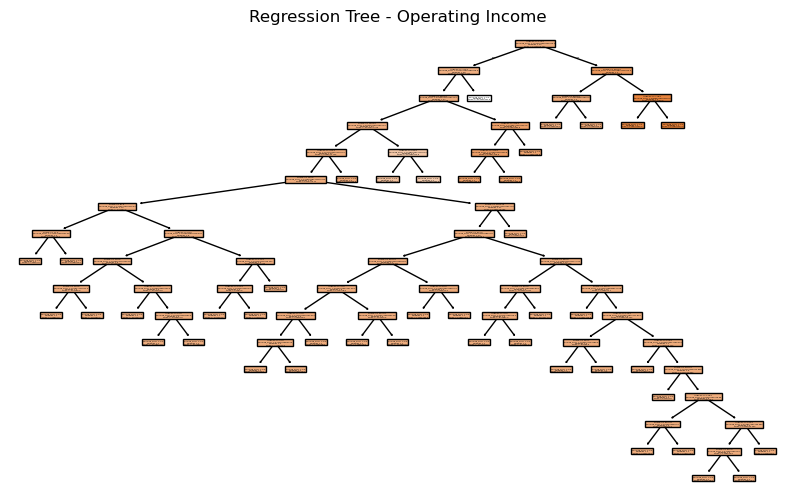

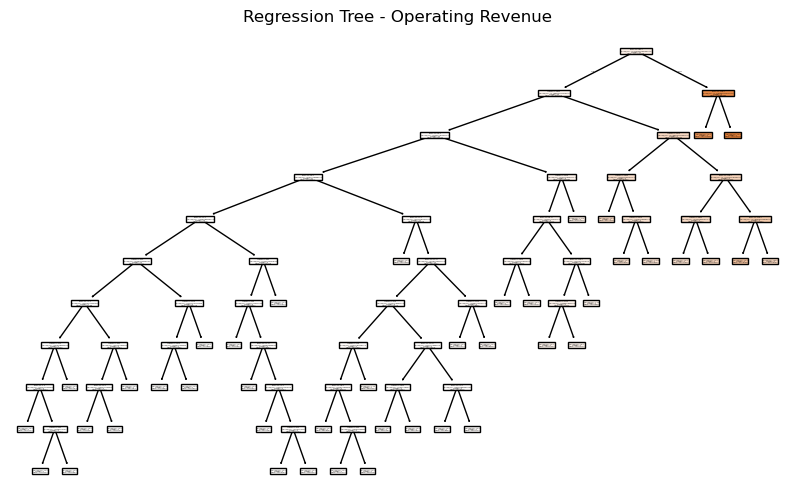

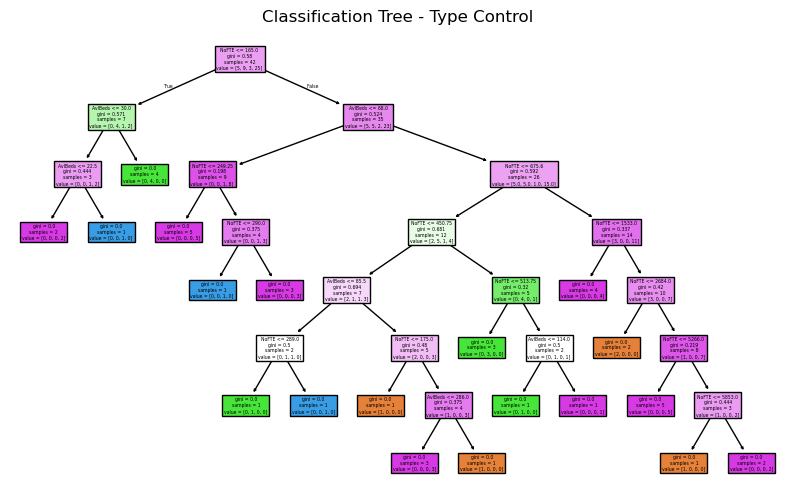

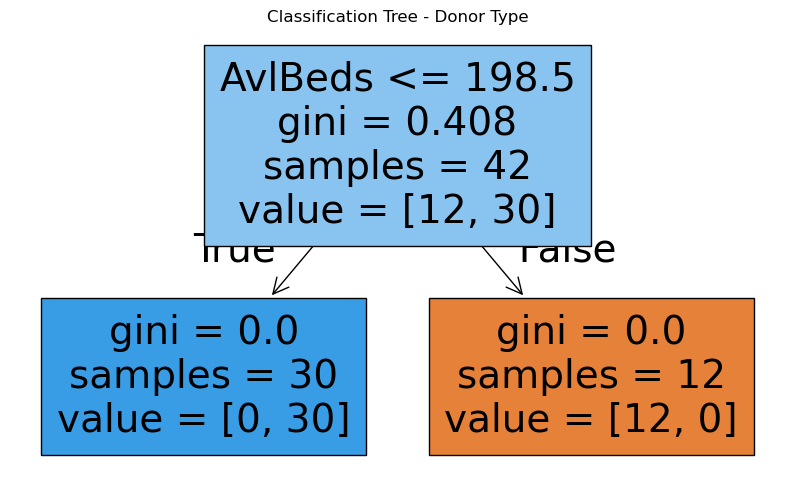

In [5]:
# Helper to plot decision trees
def plot_tree_model(tree, title, feature_names):
    plt.figure(figsize=(10, 6))
    plot_tree(tree, filled=True, feature_names=feature_names)
    plt.title(title)
    plt.show()

# Plot all four trees
plot_tree_model(tree_inc, "Regression Tree - Operating Income", X.columns)
plot_tree_model(tree_rev, "Regression Tree - Operating Revenue", X.columns)
plot_tree_model(tree_type, "Classification Tree - Type Control", X.columns)
plot_tree_model(tree_donor, "Classification Tree - Donor Type", X.columns)


Regression Tree: Operating Income
The tree shows that AvlBeds and NoFTE significantly affect operating income. These splits make sense since staffing and bed availability correlate with cost and scale of services. The tree distinguishes large hospitals with negative or high income versus smaller facilities.

Regression Tree: Operating Revenue
The revenue tree splits on similar variables but in a more layered way, indicating revenue is impacted by many interrelated variables. Hospital size and teaching status drive revenue differences, which aligns with expectations of larger, teaching hospitals having higher throughput and funding.

Classification Tree: TypeControl
This tree uses NoFTE and AvlBeds to differentiate control types. For example, smaller hospitals trend toward "District" or "Investor" control, while large facilities more often fall under "Non Profit." The tree captures general patterns, though there's some class mixing.

Classification Tree: DonorType
This was the simplest and cleanest tree. A single split on AvlBeds completely separates hospitals with "Alumni" vs. "Charity" donor bases. It suggests strong separation of donor support based purely on hospital size — likely related to affiliations with medical schools.

The DonorType classification tree appears to be the best model. It has a single, intuitive split on AvlBeds that perfectly separates the two categories. This model is both accurate and easy to interpret. The regression trees and TypeControl classifier were more complex and less interpretable.

References <br> 

DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, train_test_split <br>
https://scikit-learn.org/stable/modules/tree.html 

Matplotlib Documentation
Used for visualizing decision trees
https://matplotlib.org/stable/contents.html

Scikit-learn Preprocessing: Label Encoding
Used to convert categorical variables (TypeControl, DonorType) into numerical form for modeling
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html